## Parabolic Phi

ne(ρ) = a ρ^2 + b ρ + c  
then φ will be [a, b, c].

Prior distribution: $p(\phi)$

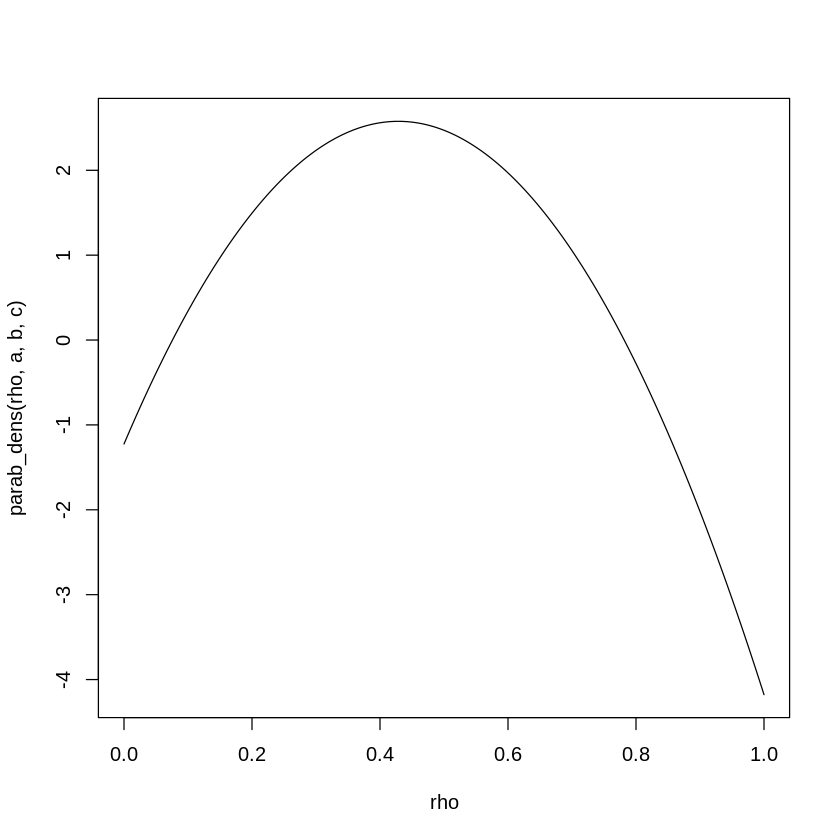

In [1]:
parab_dens <- function(rho, a, b, c){a*rho^2+ b*rho+ c}#Parabolic Electron Density
a <- -20.69092 ; b <- 17.73766; c <- -1.224814 
rho <- seq(0, 1, 0.001)
plot(rho, parab_dens(rho, a, b, c), type = 'l')

In [2]:
install.packages("pracma")
library("pracma")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



### Python functions in R

In [3]:
get_rho <- function(R, Z){
    (R - 1.5)^2 / 0.16 + Z ** 2 / 0.25
}


draw_line <- function(x_start, y_start, x_end, y_end, n_points){
    m <- (y_end-y_start)/(x_end-x_start)
    c <- y_start-m*x_start
    #print('m=', m, 'c=' ,c )
    x <- seq(x_start, x_end, length.out=n_points)
    y <- m*x+ c
    #cat(x, y)
    return(list(v1=x, v2=y))
}

RZ_line <- function(start_angles, end_angles){
    num_los  <- length(start_angles)
    rho_line <- rep(0, num_los)
    for (i in 1:num_los){
        x_start <-  1.5 + 0.5 * cos(start_angles[i])
        x_end   <-  1.5 + 0.5 * cos(end_angles[i])
        y_start <-  0.5 * sin(start_angles[i])
        y_end   <-  0.5 * sin(end_angles[i])    
        #R_line, Z_line = draw_line(x_start, y_start, x_end, y_end, 1000)
        rho_line[i] <-get_rho(draw_line(x_start, y_start, x_end, y_end, 1000))
    }
    return(rho_line)
}


#########  Working electron density profile  --------------------------------------
map_profile_to_1d <- function(rho_1d, dens_1d, rho_2d){
    '
    Map 1-D electron density profile to 2-D
    '
    #rho_2d_flat = rho_2d.flatten()
    rho_2d_flat <-rho_2d
    
    #dens_2d_flat = np.zeros_like(rho_2d_flat)
    dens_2d_flat <- rep(0, length(rho_2d_flat))
    
    #indices_inside = np.argwhere(rho_2d_flat <= 1.0).flatten()
    argwhere <- function(x,funct)which(funct(x))
    f <- function(x){x <= 1}
    indices_inside <- argwhere(rho_2d_flat, f)
    
    #dens_2d_flat[indices_inside] = interp1d(rho_1d, dens_1d, kind='cubic')(rho_2d_flat[indices_inside])
    dens_2d_flat[indices_inside] <- interp1(rho_1d, dens_1d, rho_2d_flat[indices_inside], method='cubic')##
    
    #dens_2d_flat[rho_2d_flat > 1.0] = np.nan
    dens_2d_flat[rho_2d_flat > 1.0] = NaN ## they used nan
    
    #return dens_2d_flat.reshape(rho_2d.shape)
    return(dens_2d_flat)
} #### -----------------------------------------------------------------------------

## Test Single Line 

 a= -21.47133 , b= 21.47133 c= -1.023608 


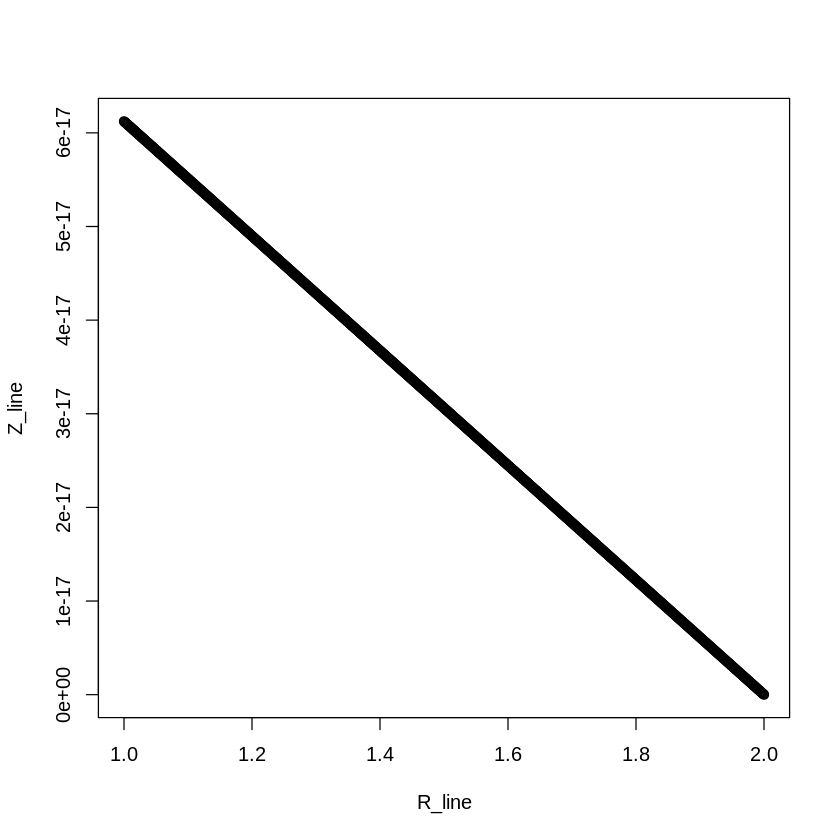

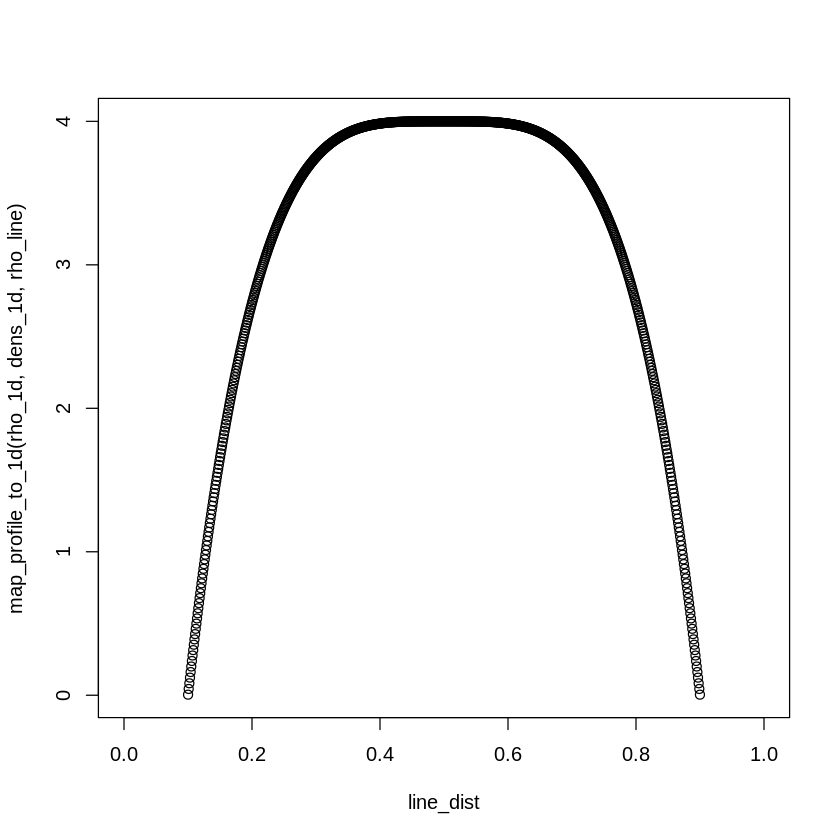

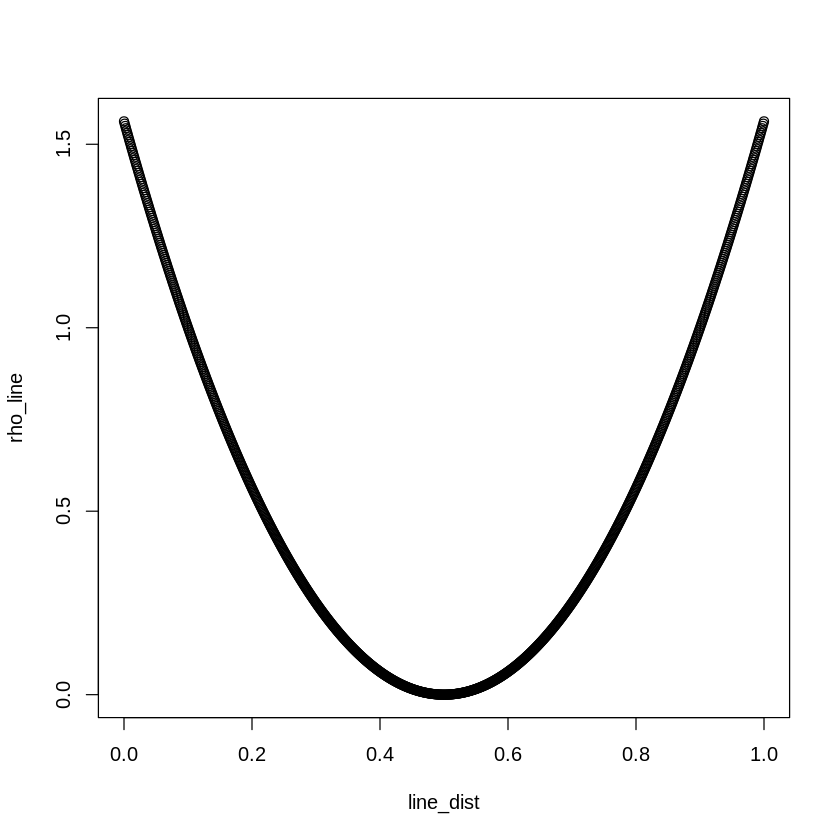

In [7]:
end_angles <-  seq(0.4, pi, length.out=5)
start_angles <-  rep(0, length(end_angles))
n_line <-3 

x_start <-  1.5 + 0.5 * cos(start_angles[n_line])
x_end   <-  1.5 + 0.5 * cos(end_angles[n_line])
y_start <-  0.5 * sin(start_angles[n_line])
y_end   <-  0.5 * sin(end_angles[n_line]) 
path_len <- sqrt((x_start- x_end)^2 + (y_start-y_end)^2)


line_dist= seq(0, path_len, length.out=1000)
RZ = draw_line(x_start, y_start, x_end, y_end, 1000)
R_line <- RZ[1]$v1
Z_line <- RZ[2]$v2

rho_line = get_rho(R_line, Z_line)
rho_1d = seq(0, 1, length.out=101)
dens_1d = (1 - rho_1d^2) * 4.0##
e_density <- map_profile_to_1d(rho_1d, dens_1d, rho_line)
e_density_cf <- e_density[!is.na(e_density)]## mask out na values
line_cf <- line_dist[!is.na(e_density)] ## take out same sections of the line values


### curve fit
if (length(e_density_cf)>0){
    df <- data.frame(x=line_cf, y=e_density_cf)
    x_axis <- df$x#seq(1, 10, length=10)
    linear_model2 <- lm(y~poly(x,2,raw=TRUE), data=df)
    p<-predict(linear_model2, data.frame(x=x_axis))
    c <-summary(linear_model2)$coefficients[, 1][[1]]
    b <-summary(linear_model2)$coefficients[, 1][[2]]
    a <-summary(linear_model2)$coefficients[, 1][[3]]
    cat(' a=', a, ', b=', b,'c=',c ,'\n')
}
plot(R_line, Z_line)
plot(line_dist, map_profile_to_1d(rho_1d, dens_1d, rho_line))
plot(line_dist, rho_line)

### Find coefficents ($\phi_1, \phi_2, \phi_3$)

In [256]:
end_angles <-  seq(pi/4, 3*pi/4, length.out=2000) 
start_angles <-  rep(0, length(end_angles)) ## want them to all start in one place end in other 
n_line <-2 
rho_1d = seq(0, 1, length.out=101)
dens_1d = (1 - rho_1d^2) * 4.0##

for ( nl in 1:length(end_angles)){
    x_start <-  1.5 + 0.5 * cos(start_angles[nl])
    x_end   <-  1.5 + 0.5 * cos(end_angles[nl])
    y_start <-  0.5 * sin(start_angles[nl])
    y_end   <-  0.5 * sin(end_angles[nl]) 
    path_len <- sqrt((x_start- x_end)^2 + (y_start-y_end)^2)

    line_dist= seq(0, path_len, length.out=1000)
    RZ = draw_line(x_start, y_start, x_end, y_end, 1000)
    R_line <- RZ[1]$v1
    Z_line <- RZ[2]$v2
    rho_line <- get_rho(R_line, Z_line)
    e_density <- map_profile_to_1d(rho_1d, dens_1d, rho_line)
    e_density_cf <- e_density[!is.na(e_density)]## mask out na values
    line_cf <- line_dist[!is.na(e_density)] ## take out same sections of the line values
    if (length(e_density_cf)>0){#only curve fit if its not just na values
        df <- data.frame(x=line_cf, y=e_density_cf)
        x_axis <- df$x#seq(1, 10, length=10)
        linear_model2 <- lm(y~poly(x,2,raw=TRUE), data=df)
        p<-predict(linear_model2, data.frame(x=x_axis))
        c_ <-summary(linear_model2)$coefficients[, 1][[1]]
        b_ <-summary(linear_model2)$coefficients[, 1][[2]]
        a_ <-summary(linear_model2)$coefficients[, 1][[3]]
        if (sum(c(a_,b_,c_))!=0){
        a <- c(a, a_);b <- c(b, b_);c <- c(c, c_)
        cat(' a=', a_, ', b=', b_,'c=',c_ ,'\n')
        }
    }
    
}


"ranges"
cat('a_range:',a[which.min(a)], ' to ', a[which.max(a)], '\n',
    'b_range:',b[which.min(b)], ' to ', b[which.max(b)], '\n',
    'c_range:',c[which.min(c)], ' to ', c[which.max(c)], '\n')

Warning message in min(xi):
“no non-missing arguments to min; returning Inf”
Warning message in max(xi):
“no non-missing arguments to max; returning -Inf”
Warning message in min(xi):
“no non-missing arguments to min; returning Inf”
Warning message in max(xi):
“no non-missing arguments to max; returning -Inf”
Warning message in min(xi):
“no non-missing arguments to min; returning Inf”
Warning message in max(xi):
“no non-missing arguments to max; returning -Inf”
Warning message in min(xi):
“no non-missing arguments to min; returning Inf”
Warning message in max(xi):
“no non-missing arguments to max; returning -Inf”
Warning message in min(xi):
“no non-missing arguments to min; returning Inf”
Warning message in max(xi):
“no non-missing arguments to max; returning -Inf”
Warning message in min(xi):
“no non-missing arguments to min; returning Inf”
Warning message in max(xi):
“no non-missing arguments to max; returning -Inf”
Warning message in min(xi):
“no non-missing arguments to min; returnin

 a= -36.76457 , b= 25.72496 c= -4.499967 
 a= -36.75724 , b= 25.73229 c= -4.498305 
 a= -36.75011 , b= 25.73977 c= -4.496669 
 a= -36.74257 , b= 25.74693 c= -4.49498 
 a= -36.73605 , b= 25.75481 c= -4.49342 
 a= -36.72817 , b= 25.7617 c= -4.491688 
 a= -36.72127 , b= 25.76926 c= -4.490076 
 a= -36.71301 , b= 25.77586 c= -4.488297 
 a= -36.70667 , b= 25.7838 c= -4.486757 
 a= -36.69976 , b= 25.79132 c= -4.485143 
 a= -36.69209 , b= 25.79827 c= -4.483428 
 a= -36.68491 , b= 25.80558 c= -4.481785 
 a= -36.67669 , b= 25.81213 c= -4.480006 
 a= -36.67046 , b= 25.82009 c= -4.478482 
 a= -36.66303 , b= 25.82716 c= -4.4768 
 a= -36.65598 , b= 25.83448 c= -4.475164 
 a= -36.6493 , b= 25.84206 c= -4.473573 
 a= -36.64119 , b= 25.84863 c= -4.471816 
 a= -36.63333 , b= 25.8553 c= -4.470065 
 a= -36.62577 , b= 25.86224 c= -4.468376 
 a= -36.62051 , b= 25.87076 c= -4.46696 
 a= -36.61152 , b= 25.87662 c= -4.465078 
 a= -36.60484 , b= 25.88414 c= -4.463499 
 a= -36.59625 , b= 25.89026 c= -4.461667 
 

[1] "ranges"

a_range: -36.76457  to  2.186879 
 b_range: -143.9706  to  27.53383 
 c_range: -4.499967  to  57.87087 


## Diffrent Fits

[1] 817

[1] 817


Call:
lm(formula = y ~ poly(x, 3, raw = TRUE), data = df)

Coefficients:
            (Intercept)  poly(x, 3, raw = TRUE)1  poly(x, 3, raw = TRUE)2  
                -1.6842                  23.9709                 -24.7015  
poly(x, 3, raw = TRUE)3  
                 0.1554  


[1] "accessing fit"

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.6841773,0.07945447,-21.1967606,9.976070e-80
"poly(x, 3, raw = TRUE)1",23.9708983,0.61342515,39.0771364,7.998744e-189
"poly(x, 3, raw = TRUE)2",-24.7014546,1.38049565,-17.8931781,1.262961e-60
"poly(x, 3, raw = TRUE)3",0.1554167,0.93617541,0.1660124,8.681885e-01


 a= 0.1554167 , b= -24.70145 c= 23.9709 


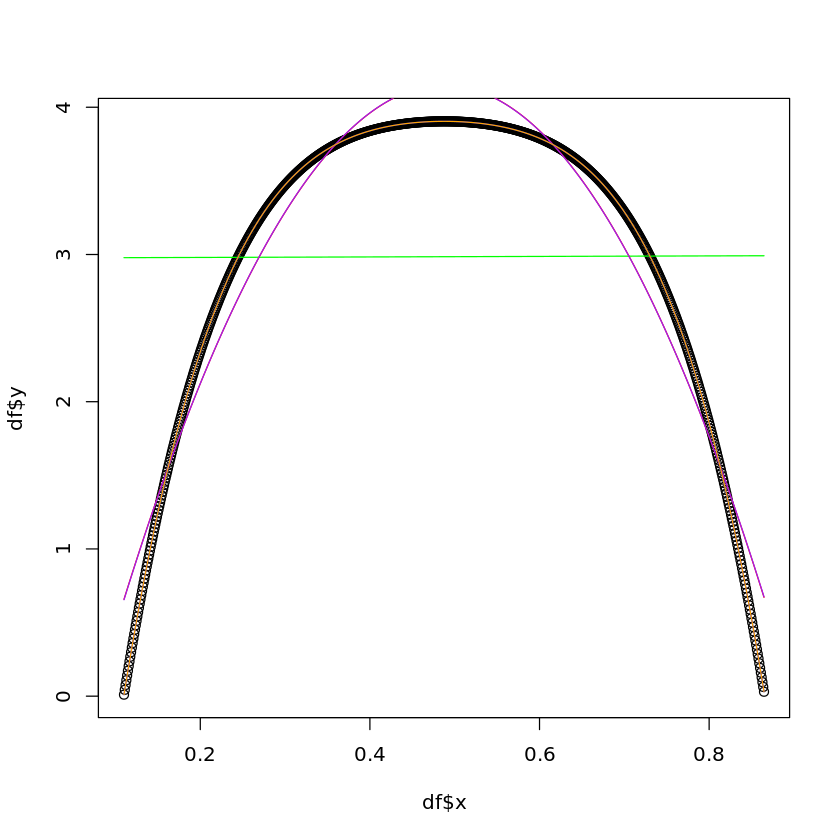

In [260]:
length(line_cf)
length(e_density_cf)

df <- data.frame(x=line_cf, y=e_density_cf)
  
# fit polynomial regression models up to degree 5
linear_model1 <- lm(y~x, data=df)
linear_model2 <- lm(y~poly(x,2,raw=TRUE), data=df)
linear_model3 <- lm(y~poly(x,3,raw=TRUE), data=df)
linear_model4 <- lm(y~poly(x,4,raw=TRUE), data=df)
linear_model5 <- lm(y~poly(x,5,raw=TRUE), data=df)
  
# create a basic scatterplot 
plot(df$x, df$y)
  
# define x-axis values
x_axis <- df$x#seq(1, 10, length=10)
  
# add curve of each model to plot
lines(x_axis, predict(linear_model1, data.frame(x=x_axis)), col='green')
lines(x_axis, predict(linear_model2, data.frame(x=x_axis)), col='red')
lines(x_axis, predict(linear_model3, data.frame(x=x_axis)), col='purple')
lines(x_axis, predict(linear_model4, data.frame(x=x_axis)), col='blue')
lines(x_axis, predict(linear_model5, data.frame(x=x_axis)), col='orange')
linear_model3
"accessing fit"
summary(linear_model3)$coefficients

d <- summary(linear_model3)$coefficients[, 1][[1]]
c <- summary(linear_model3)$coefficients[, 1][[2]]
b <- summary(linear_model3)$coefficients[, 1][[3]]
a <- summary(linear_model3)$coefficients[, 1][[4]]

#summary(linear_model3)$coefficients[, 1][[4]]

cat(' a=', a, ', b=', b,'c=',c ,'\n')
# linear_model3$coefficients[1]
# linear_model3$coefficients[2]
# linear_model3$coefficients[3]
# linear_model3$coefficients[4]

#predict(linear_model3, data.frame(x=x_axis))

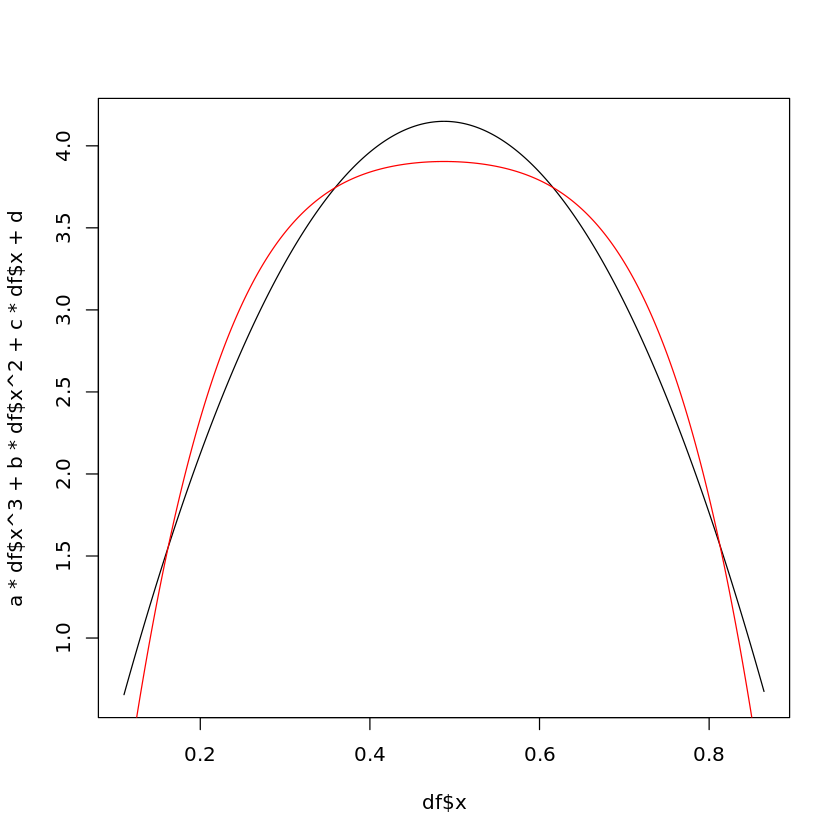

In [264]:
plot(df$x, a*df$x^3+b*df$x^2+ c*df$x+d, type = 'l')
lines(df$x, df$y, col='red')

In [246]:
end_angles <-  seq(0, 2*pi, length.out=5)
start_angles <-  rep(0, length(end_angles))
n_line <-4 

x_start <-  1.5 + 0.5 * cos(start_angles[n_line])
x_end   <-  1.5 + 0.5 * cos(end_angles[n_line])
y_start <-  0.5 * sin(start_angles[n_line])
y_end   <-  0.5 * sin(end_angles[n_line]) 
path_len <- sqrt((x_start- x_end)^2 + (y_start-y_end)^2)


line_dist= seq(0, path_len, length.out=1000)
RZ = draw_line(x_start, y_start, x_end, y_end, 1000)
R_line <- RZ[1]$v1
Z_line <- RZ[2]$v2

rho_line = get_rho(R_line, Z_line)
e_density <- map_profile_to_1d(rho_1d, dens_1d, rho_line)
e_density_cf <- e_density[!is.na(e_density)]
line_cf <- line_dist[!is.na(e_density)]
length(e_density_cf)
length(line_cf)

### curve fit
df <- data.frame(x=line_cf, y=e_density_cf)
x_axis <- df$x#seq(1, 10, length=10)
linear_model2 <- lm(y~poly(x,2,raw=TRUE), data=df)
p<-predict(linear_model2, data.frame(x=x_axis))
c <-summary(linear_model2)$coefficients[, 1][[1]]
b <-summary(linear_model2)$coefficients[, 1][[2]]
a <-summary(linear_model2)$coefficients[, 1][[3]]
cat(' a=', a, ', b=', b,'c=',c ,'\n')



[1] 780

[1] 780

 a= -31.86228 , b= 27.47428 c= -3.357563 


## 2D Plotting

In [267]:
R <- seq(1, 2, length.out=105)
Z <- seq(-0.5, 0.5, length.out=105)

for (r in R){ ### line width
    r_line   <- rep(r, 105)
    rho_line <- get_rho(r_line, Z)
    e_line   <- map_profile_to_1d(rho_1d, dens_1d, rho_line)
    df_2D <- data.frame(x=, y=e_density_cf)
    
}





1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,⋯,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1.009615,1.009615,1.009615,1.009615,1.009615,1.009615,1.009615,1.009615,1.009615,1.009615,⋯,1.009615,1.009615,1.009615,1.009615,1.009615,1.009615,1.009615,1.009615,1.009615,1.009615
1.019231,1.019231,1.019231,1.019231,1.019231,1.019231,1.019231,1.019231,1.019231,1.019231,⋯,1.019231,1.019231,1.019231,1.019231,1.019231,1.019231,1.019231,1.019231,1.019231,1.019231
1.028846,1.028846,1.028846,1.028846,1.028846,1.028846,1.028846,1.028846,1.028846,1.028846,⋯,1.028846,1.028846,1.028846,1.028846,1.028846,1.028846,1.028846,1.028846,1.028846,1.028846
1.038462,1.038462,1.038462,1.038462,1.038462,1.038462,1.038462,1.038462,1.038462,1.038462,⋯,1.038462,1.038462,1.038462,1.038462,1.038462,1.038462,1.038462,1.038462,1.038462,1.038462
1.048077,1.048077,1.048077,1.048077,1.048077,1.048077,1.048077,1.048077,1.048077,1.048077,⋯,1.048077,1.048077,1.048077,1.048077,1.048077,1.048077,1.048077,1.048077,1.048077,1.048077
1.057692,1.057692,1.057692,1.057692,1.057692,1.057692,1.057692,1.057692,1.057692,1.057692,⋯,1.057692,1.057692,1.057692,1.057692,1.057692,1.057692,1.057692,1.057692,1.057692,1.057692
1.067308,1.067308,1.067308,1.067308,1.067308,1.067308,1.067308,1.067308,1.067308,1.067308,⋯,1.067308,1.067308,1.067308,1.067308,1.067308,1.067308,1.067308,1.067308,1.067308,1.067308
1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,⋯,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923
1.086538,1.086538,1.086538,1.086538,1.086538,1.086538,1.086538,1.086538,1.086538,1.086538,⋯,1.086538,1.086538,1.086538,1.086538,1.086538,1.086538,1.086538,1.086538,1.086538,1.086538
1.096154,1.096154,1.096154,1.096154,1.096154,1.096154,1.096154,1.096154,1.096154,1.096154,⋯,1.096154,1.096154,1.096154,1.096154,1.096154,1.096154,1.096154,1.096154,1.096154,1.096154


In [269]:
?matrix

In [89]:
getDensProfile <- function(start_angle, end_angle){
    x_start <-  1.5 + 0.5 * cos(start_angle)
    x_end   <-  1.5 + 0.5 * cos(end_angle)
    y_start <-  0.5 * sin(start_angle)
    y_end   <-  0.5 * sin(end_angle) 
    path_len <- sqrt((x_start- x_end)^2 + (y_start-y_end)^2)


    line_dist= seq(0, path_len, length.out=1000)
    RZ = draw_line(x_start, y_start, x_end, y_end, 1000)
    R_line <- RZ[1]$v1
    Z_line <- RZ[2]$v2

    rho_line = get_rho(R_line, Z_line)
    rho_1d = seq(0, 1, length.out=101)
    dens_1d = (1 - rho_1d^2) * 4.0##
    e_density <- map_profile_to_1d(rho_1d, dens_1d, rho_line)
    e_density_cf <- e_density[!is.na(e_density)]## mask out na values
    line_cf <- line_dist[!is.na(e_density)] ## take out same sections of the line values
    dens <- data.frame(x=line_cf, y=e_density_cf)
    return(dens)
}

#given sampled coefficients, 
calcLIDphi <- function(a,b,c,d,e,lower,upper){
    x2 <- upper
    x1 <- lower
    return(((a/5)*x2^5+(b/4)*x2^4+(c/3)*x2^3+(d/2)*x2^2+e*x2) - ((a/5)*x1^5+(b/4)*x1^4+(c/3)*x1^3+(d/2)*x1^2+e*x1))
}


LIDtrue <- function(start_angle, end_angle){
    dens <- getDensProfile(start_angle, end_angle)
    linear_model2 <- lm(y~poly(x,4,raw=TRUE), data=dens)
    e <-summary(linear_model2)$coefficients[, 1][[1]]
    d <-summary(linear_model2)$coefficients[, 1][[2]]
    c <-summary(linear_model2)$coefficients[, 1][[3]]
    b <-summary(linear_model2)$coefficients[, 1][[4]]
    a <-summary(linear_model2)$coefficients[, 1][[5]]
    fittedDens <- function(x){
        return(a*x^4 + b*x^3 + c*x^2 + d*x + e)
    }
    lo <- dens$x[1]
    up <- tail(dens$x,n=1)
    LIDt <- calcLIDphi(a,b,c,d,e,lo,up)
    return(LIDt)
}


LIDt 2.559999
LID_phi 0.3393555
likelihood 0.2946445
evidence 3.51102
ui -0.3000005
LID_phi -0.4175664
likelihood -0.310202
evidence 2.159059

Warning message in utility(Dj):
“NaNs produced”



ui NaN

ERROR: Error in summary(linear_model2)$coefficients[, 1][[5]]: subscript out of bounds


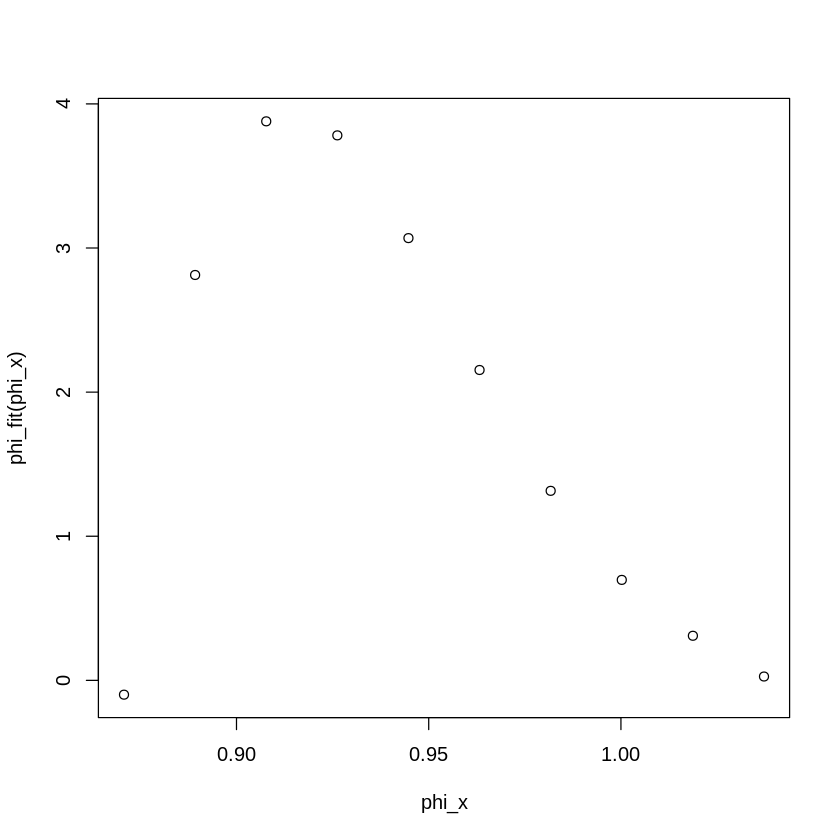

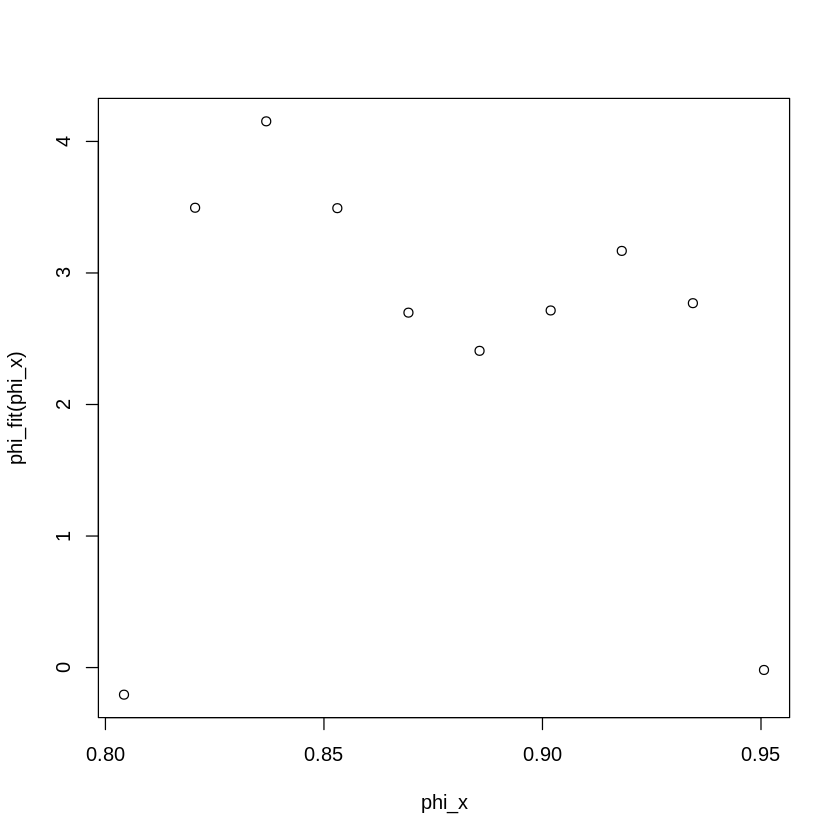

In [96]:
eta <- c(0,pi)
LIDt <- LIDtrue(eta[1],eta[2])
x <- getDensProfile(eta[1],eta[2])$x
x_entry <- x[1]
x_exit <- tail(x,n=1)
exp_er <- 0.3
n <- 100
#daniel evaluating expected utility

phiSample <- function(){
    #we assume the plasma starts and ends 0.2m from the models values
    phi_start = runif(1,x_entry-0.2, x_exit+0.2)
    phi_end = runif(1,x_exit-0.2, x_exit+0.2)
    phi_x <- seq(phi_start,phi_end,length.out=10)
    #the plasma density must start and end at 0 and be a random configuration of a polynomial.
    random_dens = c(0,runif(8,0,5),0)
    phi_df <- data.frame(x=phi_x, y=random_dens)
    linear_model2 <- lm(y~poly(x,4,raw=TRUE), data=phi_df)
    e <-summary(linear_model2)$coefficients[, 1][[1]]
    d <-summary(linear_model2)$coefficients[, 1][[2]]
    c <-summary(linear_model2)$coefficients[, 1][[3]]
    b <-summary(linear_model2)$coefficients[, 1][[4]]
    a <-summary(linear_model2)$coefficients[, 1][[5]]
    phi_fit <- function(x){
        a*x^4 + b*x^3 + c*x^2 + d*x + e
    }
    plot(phi_x,phi_fit(phi_x))
    LIDphi <- calcLIDphi(lower=phi_start, upper=phi_end,a,b,c,d,e)
    return(LIDphi)
}

utility <- function(Dj){
    #to sample many phi_i we need to sample many phi coefficients from a uniform dist
    #Likelihood P(Dj|phi_i,eta)
    utility_n <- vector()
    for (i in seq(1,n)){
        LID_phi <- phiSample()
        cat("\nLID_phi", LID_phi)
        likelihood <- rnorm(1,mean=LID_phi,sd=exp_er)
        cat("\nlikelihood", likelihood)
        evidence <- rnorm(1,mean=LIDt,sd=exp_er)
        cat("\nevidence", evidence)
        utility_i <- (likelihood/evidence)*log2(likelihood/evidence)
        cat("\nui", utility_i)
        utility_n <- c(utility_n,utility_i)
    }
    utility <- mean(utility_n)
    cat('\nutility',utility)
    return(utility)
}

exUtility <- function(){
    #sampling data points. The experiment will measure a LID which is close to LIDt. 
    D <- rnorm(n, mean=LIDt, sd=exp_er)
    exutility_n <- vector()
    for (Dj in D){
        exutility <- c(exutility_n,utility(Dj))
    }
    exutility <- mean(exutility_n)
}
cat("LIDt",LIDt)
exu <- exUtility()
cat("exU",exu)

In [42]:
eta <- c(0,pi)
getDensProfile(eta[1],eta[2])

x,y
<dbl>,<dbl>
0.1001001,0.004002506
0.1011011,0.043862789
0.1021021,0.083423494
0.1031031,0.122687241
0.1041041,0.161654777
0.1051051,0.200328085
0.1061061,0.238708207
0.1071071,0.276797012
0.1081081,0.314595670
